#### Our goal is to determine usage differences between casual riders and members and suggest marketing strategies to increase membership.

Data source:https://divvy-tripdata.s3.amazonaws.com/index.html

### Downloading libraries

In [28]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Downloading the data 

In [3]:
dates=['2021_04','2021_05','2021_06','2021_07','2021_08','2021_09','2021_10','2021_11','2021_12','2022_01','2022_02','2022_03']

In [4]:
cyclist=pd.DataFrame()

In [5]:
for i in dates:
    df=pd.read_csv('cyclistic_data_%s.csv'%i)
    cyclist= pd.concat([cyclist,df],axis=0)

In [6]:
cyclist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5723532 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


In [7]:
cyclist.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,2021-04
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,2021-04
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,2021-04
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,2021-04
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,2021-04


In [7]:
cyclist.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

There are some null values in station names.We can fill the names using the ids.

In [8]:
cyclist[(cyclist['start_station_id'].isnull()==False)&  (cyclist['start_station_name'].isnull()==True)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
569263,176105D1F8A1216B,electric_bike,2021-07-18 03:44:22,2021-07-18 04:12:23,NaN,13221,NaN,NaN,41.907655,-87.672552,41.950000,-87.74000,casual
68001,DE82A15026BA3056,electric_bike,2021-09-21 18:18:59,2021-09-21 18:21:48,NaN,20215,Hegewisch Metra Station,20215,41.648500,-87.546089,41.648589,-87.54625,casual
675520,EE197EDA4CF8CFE5,electric_bike,2021-09-22 07:14:42,2021-09-22 07:22:38,NaN,WL-008,NaN,NaN,41.867117,-87.641087,41.880000,-87.64000,casual


There are only three columns we can fill.So ı will do it manually using unique ride_id

In [8]:
cyclist.loc[cyclist['ride_id']=='176105D1F8A1216B','start_station_name']=cyclist[cyclist['start_station_id']=='13221']['start_station_name'].iloc[0]
cyclist.loc[cyclist['ride_id']=='DE82A15026BA3056','start_station_name']=cyclist[cyclist['start_station_id']=='20215']['start_station_name'].iloc[0]
cyclist.loc[cyclist['ride_id']=='EE197EDA4CF8CFE5','start_station_name']=cyclist[cyclist['start_station_id']=='WL-008']['start_station_name'].iloc[0]

Checking if end_station_name can be used to fill end_lat or end_lng

In [10]:
cyclist[(cyclist['end_station_name'].isnull()==False)&  (cyclist['end_lat'].isnull()==True)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


No there's no data for end_station_name

In [11]:
cyclist['rideable_type'].unique() 

array(['classic_bike', 'docked_bike', 'electric_bike'], dtype=object)

In [12]:
cyclist.nunique()

ride_id               5723532
rideable_type               3
started_at            4793191
ended_at              4787114
start_station_name        861
start_station_id          852
end_station_name          860
end_station_id            852
start_lat              433057
start_lng              411835
end_lat                434703
end_lng                396215
member_casual               2
dtype: int64

There are three rideable type: classic bike, docked bike and electric bike. THere are two member types:member and casual.Number of unique station names are higher than station ids. Thus, some stations with different names share the same id.

Adding a new column for month

In [35]:
cyclist['month']=cyclist['started_at'].apply(lambda x:x[0:7])

Changing data types of columns indicating time

In [9]:
cyclist['started_at']= pd.to_datetime(cyclist['started_at'])
cyclist['ended_at']= pd.to_datetime(cyclist['ended_at'])

Adding new columns

In [10]:
cyclist['ride_length']=cyclist['ended_at'] -cyclist['started_at']
cyclist['ride_length']=cyclist['ride_length'].dt.total_seconds()/60
cyclist['day_of_week']=cyclist['started_at'].dt.dayofweek  #0 is monday
cyclist['hour']=cyclist['started_at'].dt.hour

In [15]:
cyclist['ride_length'].describe()

count    5.723532e+06
mean     2.154242e+01
std      1.770719e+02
min     -5.803333e+01
25%      6.566667e+00
50%      1.171667e+01
75%      2.133333e+01
max      5.594415e+04
Name: ride_length, dtype: float64

For some rows start time is later than end time.Not to many i will drop these rows.

In [11]:
cyclist=cyclist[cyclist['started_at']<cyclist['ended_at']]

maximum ride length is 34354 minutes which equals to nearly 572 days. This does not seem realistic. And high numbers are skewing our data. I will drop rows where ride_length is higher than two hours which is approximately 0.3% of the data. 

In [12]:
cyclist=cyclist[cyclist['ride_length']<120]

<AxesSubplot:xlabel='member_casual', ylabel='count'>

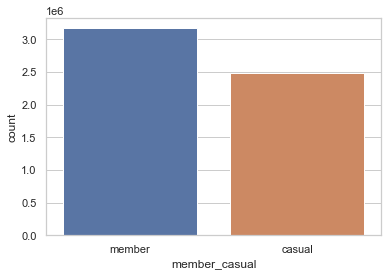

In [29]:
sns.set(style='whitegrid')
sns.countplot(x='member_casual',data=cyclist)

In [19]:
cyclist[cyclist['member_casual']=='member'].count().iloc[0]

3169722

In [20]:
cyclist[cyclist['member_casual']=='casual'].count().iloc[0]

2487767

Members use our services approximately 25% more (number of rent). If there was a rider id data we could see difference between number of rents per customer and compare members and casual riders.

In [39]:
cyclist[['start_station_name','end_station_name','rideable_type','member_casual','ride_length','day_of_week','month','hour']]

,start_station_name,end_station_name,rideable_type,member_casual,ride_length,day_of_week,month,hour
0,State St & Pearson St,Southport Ave & Waveland Ave,classic_bike,member,31.316667,0,2021-04,18
1,Dorchester Ave & 49th St,Dorchester Ave & 49th St,docked_bike,casual,64.300000,1,2021-04,17
2,Loomis Blvd & 84th St,Loomis Blvd & 84th St,docked_bike,casual,5697.650000,5,2021-04,12
3,Honore St & Division St,Southport Ave & Waveland Ave,classic_bike,member,25.100000,5,2021-04,9
4,Loomis Blvd & 84th St,Loomis Blvd & 84th St,docked_bike,casual,91.283333,5,2021-04,12
...,...,...,...,...,...,...,...,...
284037,Michigan Ave & Oak St,Streeter Dr & Grand Ave,docked_bike,casual,8.483333,6,2022-03,16
284038,Broadway & Barry Ave,Ravenswood Ave & Berteau Ave,docked_bike,casual,46.200000,2,2022-03,6
284039,NaN,Albany Ave & Montrose Ave,electric_bike,member,13.466667,2,2022-03,15
284040,NaN,Larrabee St & Division St,electric_bike,member,5.666667,0,2022-03,16


<Figure size 1008x288 with 0 Axes>

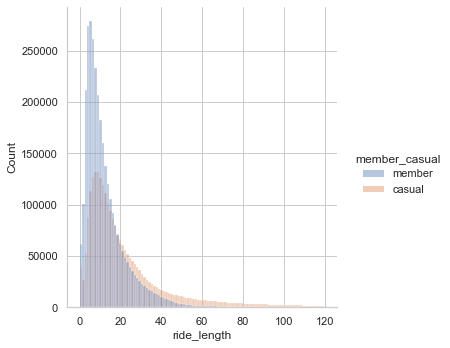

In [15]:
plt.figure(figsize=(14,4))
sns.displot(cyclist,x='ride_length',bins=100,hue='member_casual',alpha=0.4)

In [23]:
cyclist[cyclist['member_casual']=='member']['ride_length'].mean()

12.553202909697522

In [24]:
cyclist[cyclist['member_casual']=='casual']['ride_length'].mean()

22.06603472779622

Members ride our bikes for shorter time periods.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 864x288 with 0 Axes>

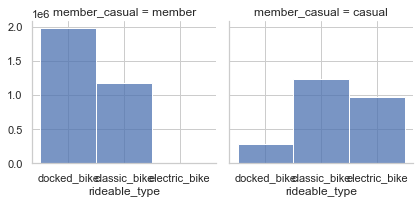

In [41]:
plt.figure(figsize=(12,4))
gridmonth= sns.FacetGrid(cyclist, col="member_casual")
gridmonth.map(sns.histplot,'rideable_type')
plt.tight_layout


Electric bikes are only prefered by casual renters while docked bikes mostly rented by members.

C:\Users\ECEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


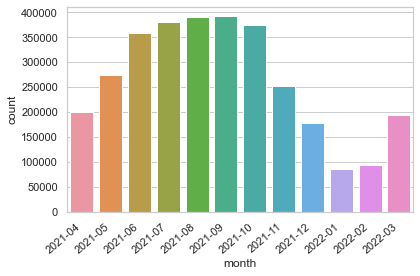

In [35]:
ax = sns.countplot(cyclist[cyclist['member_casual']=='member']['month'])  
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 
plt.tight_layout() 
plt.show()

C:\Users\ECEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


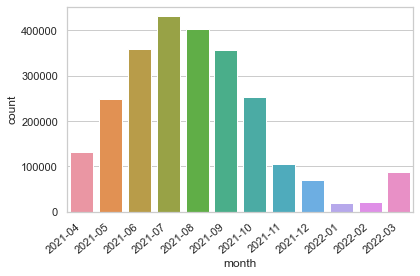

In [36]:
ax = sns.countplot(cyclist[cyclist['member_casual']=='casual']['month'])  
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 
plt.tight_layout() 
plt.show()

Although on summer and begining of fall, casual member rent nearly as much as members, during the other parts of the year casual riders's activity falls significantly.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

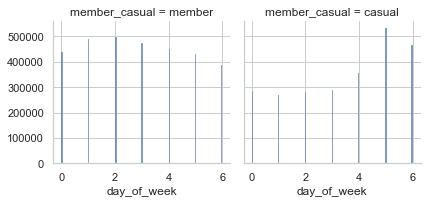

In [19]:
gridmonth= sns.FacetGrid(cyclist, col="member_casual")
gridmonth.map(sns.histplot,'day_of_week').add_legend()
plt.tight_layout

Members show less deviation throughout the week but they tend to rent more on weekdays. Casual members rent momstly on weekends. Probably people who comute to work with bicylce might prefer to become members.

#### Determinig popular stations to pick a bike for members and casual riders

In [100]:
cyclist[cyclist['member_casual']=='member'].groupby('start_station_name').count()['ride_id'].sort_values(ascending=False).head(10)

start_station_name
Kingsbury St & Kinzie St    25155
Clark St & Elm St           24889
Wells St & Concord Ln       24108
Wells St & Elm St           21272
Dearborn St & Erie St       19420
Wells St & Huron St         19232
St. Clair St & Erie St      18960
Clinton St & Madison St     18111
Broadway & Barry Ave        17955
Wabash Ave & Grand Ave      17263
Name: ride_id, dtype: int64

In [101]:
cyclist[cyclist['member_casual']=='casual'].groupby('start_station_name').count()['ride_id'].sort_values(ascending=False).head(10)

start_station_name
Streeter Dr & Grand Ave              67405
Millennium Park                      33316
Michigan Ave & Oak St                29680
Shedd Aquarium                       23211
Theater on the Lake                  21110
Wells St & Concord Ln                19923
DuSable Lake Shore Dr & Monroe St    17945
Lake Shore Dr & Monroe St            17425
Clark St & Lincoln Ave               16933
Wells St & Elm St                    16601
Name: ride_id, dtype: int64

By looking at the most popular starting stations we can see members and casual riders start their ride from different stations.Casual riders might not prefer becoming a member if our company is inactive in these areas.

In [21]:
cyclist=cyclist[cyclist['start_lng']<-80 ]    #one location was further away from other so i will drop it
cyclist=cyclist[cyclist['end_lng']>-88.8 ]

<AxesSubplot:xlabel='start_lng', ylabel='start_lat'>

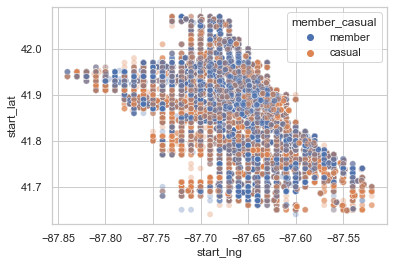

In [24]:
sns.scatterplot(data=cyclist,y='start_lat',x='start_lng',hue='member_casual',alpha=0.3)

<AxesSubplot:xlabel='end_lng', ylabel='end_lat'>

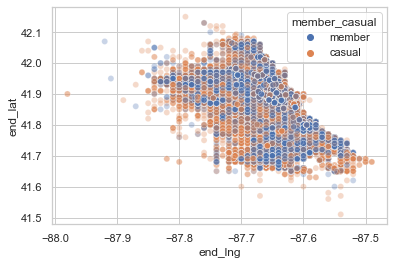

In [31]:
sns.scatterplot(data=cyclist,y='end_lat',x='end_lng',hue='member_casual',alpha=0.3)

Although there is not a clear cut distinction, people heading towards southwest of the region seems to be more casual riders.

### Conclusion

Members rent more reguarly.Because members prefer to rent more on weekdays and casual riders prefer to rent on weekends,i suspect member commute to work with bike.Maybe our marketing compaign can encourge people to bike to work for health.\
Casual rider's activity peaks on summer and begining of fall. We can have shorter memberships that does not cover the whole year.Some people might prefer them.\
Most popular starting starting stations for members and casual riders are different. And casual riders seem to accumulated around southwest of the reigon. Maybe the company needs to be more active in these areas.